In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [184]:
data = pd.read_csv('../../dataset (missing + split)/train.csv', skip_blank_lines=True)

#We create the interquartile range to delete the noise from the vars and then recreate our new data set without noise

In [185]:
#Let's create a column for the data set of all zeros to fill with the outliers
data['outliers'] = 0

In [186]:
for x in data.columns:
    if np.issubdtype(data[x].dtype, np.number) and len(data[x].unique()) > 5:
        #Handling missing values to check for changes
        #data[x].fillna(data[x].mean())
        #data.dropna(subset=[x], inplace=True)
        #Interquartile range
        Q1 = np.percentile(data[x], 25)
        Q3 = np.percentile(data[x], 75)
        IQR = Q3 - Q1

        #Lower and upper bound for outliers
        lower_bound = Q1 - 4.5 * IQR
        upper_bound = Q3 + 4.5 * IQR

        data.loc[((data[x] < lower_bound) | (data[x] > upper_bound)),'outliers'] = 1

In [187]:
data['outliers'].unique()
data.groupby('outliers').size().reset_index(name='Frequency')


,outliers,Frequency
0,0,14349
1,1,651


In [188]:
#Creating the new df
new_data = data[data['outliers']!= 1]
new_data = pd.DataFrame(new_data)

#The count of outliers in total is really high, it's almost a third of the data set, in this case we have various options.

1. winsorizing(Truncating or Capping)
2. trimming(Delete them)
3. trying to eliminate outliers after the feature selection and see if the number it's lower

#Check the difference in boxplots and hist when we change the IQR scale

#Hist code

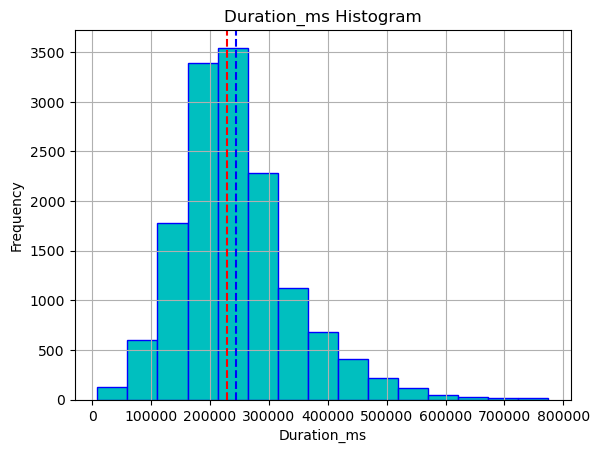

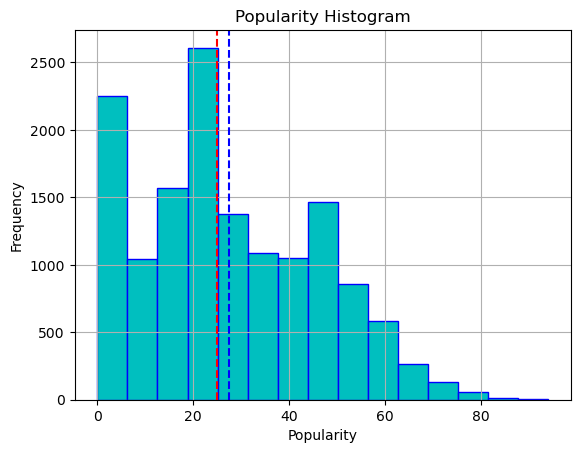

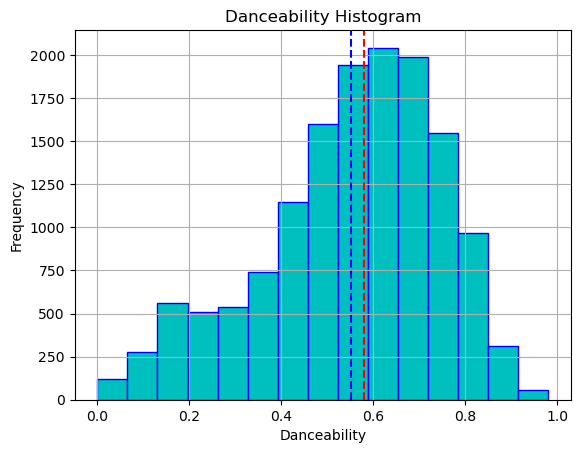

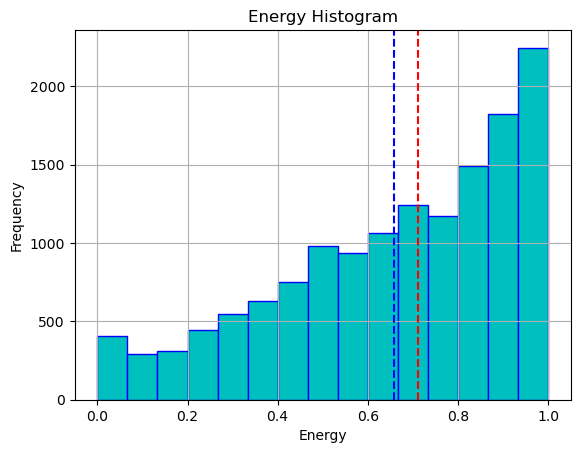

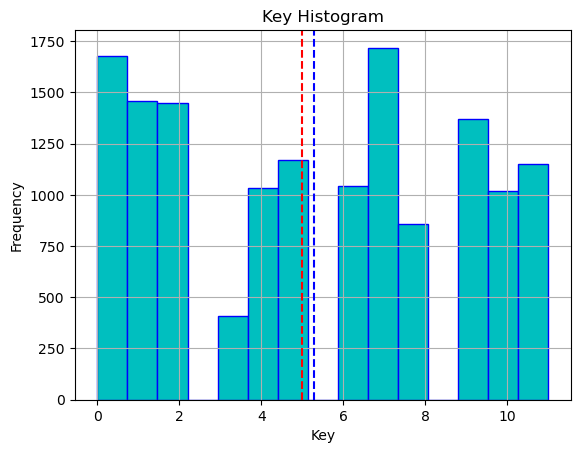

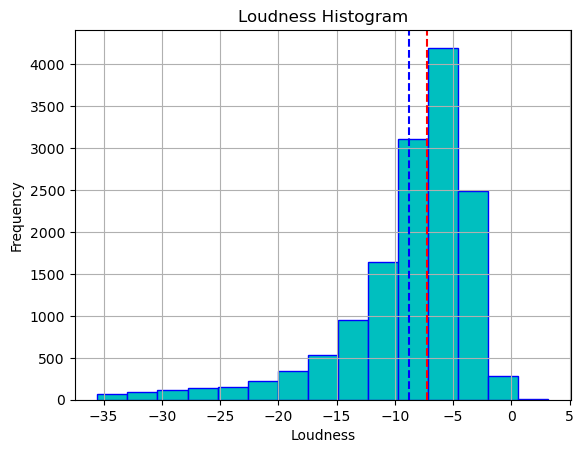

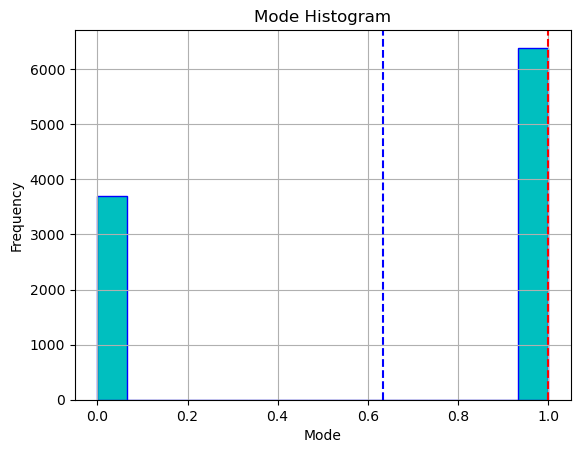

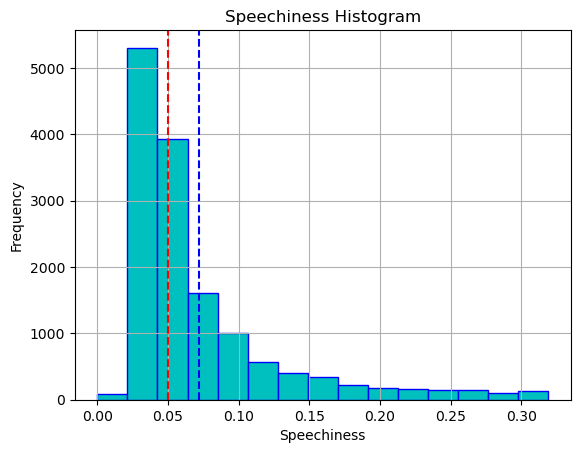

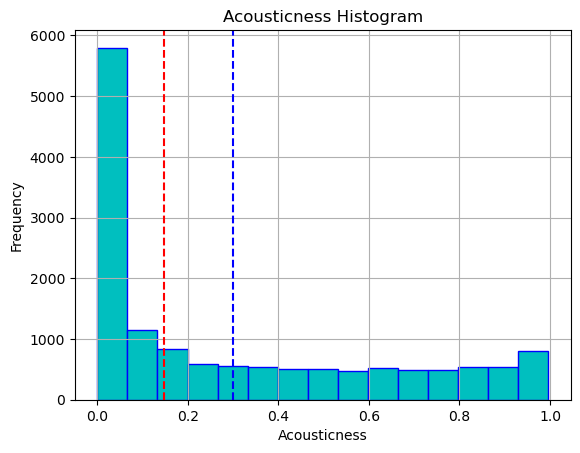

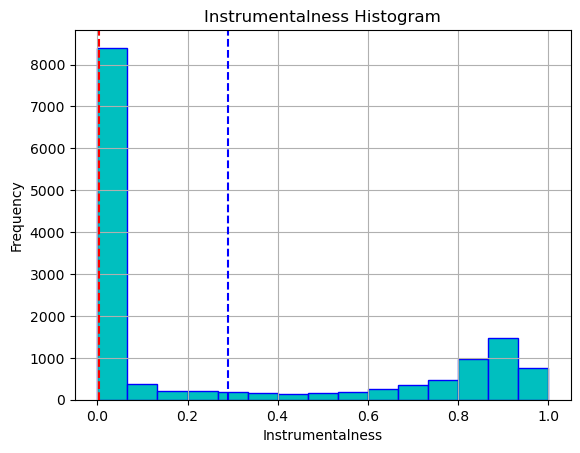

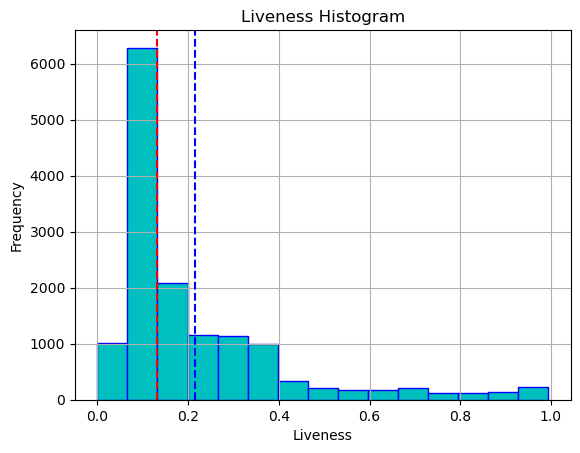

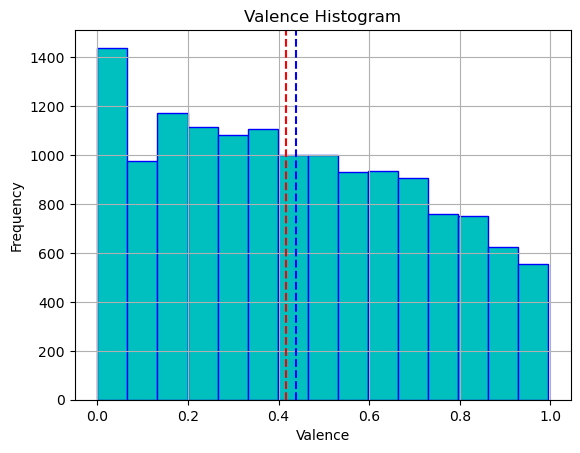

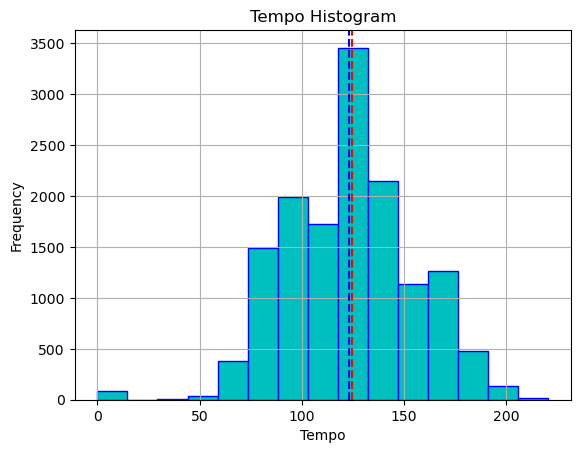

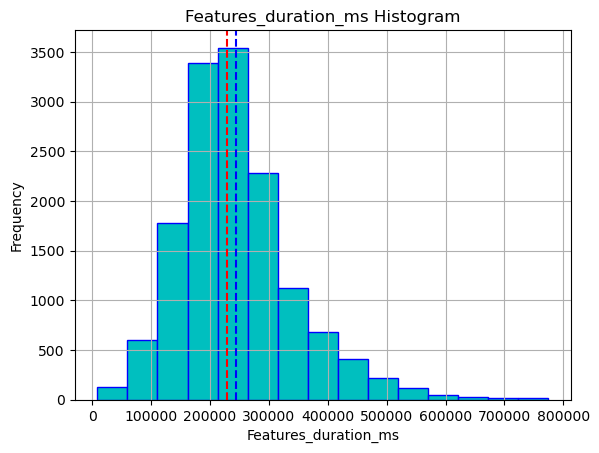

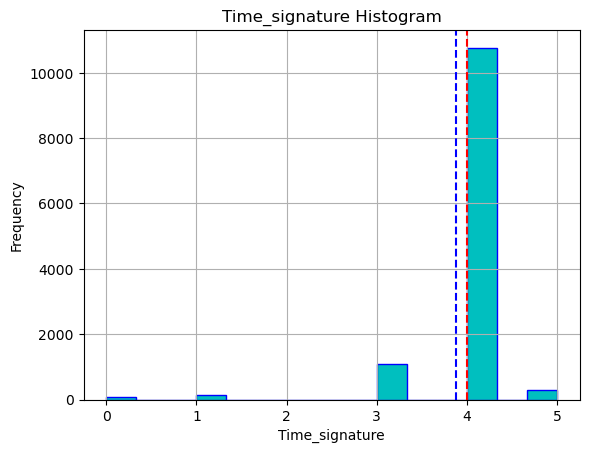

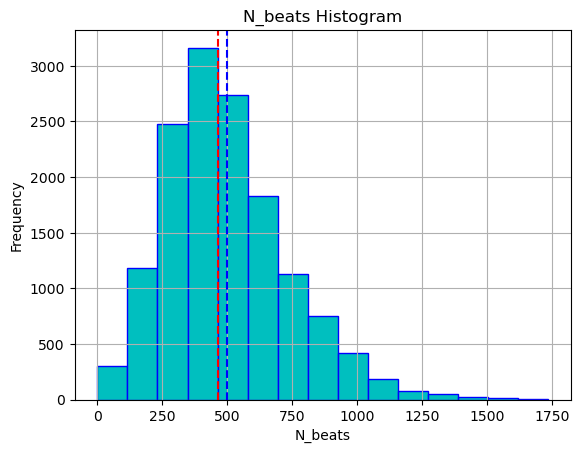

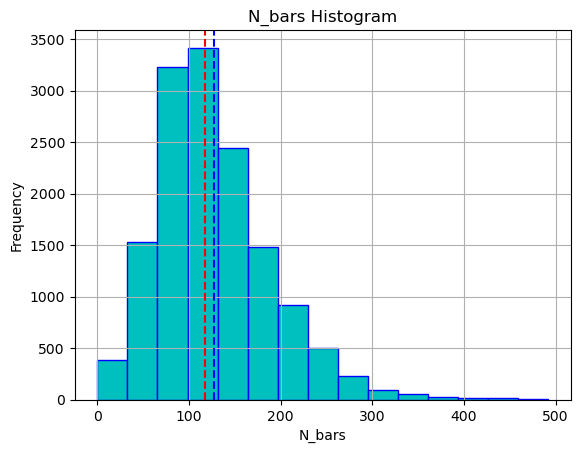

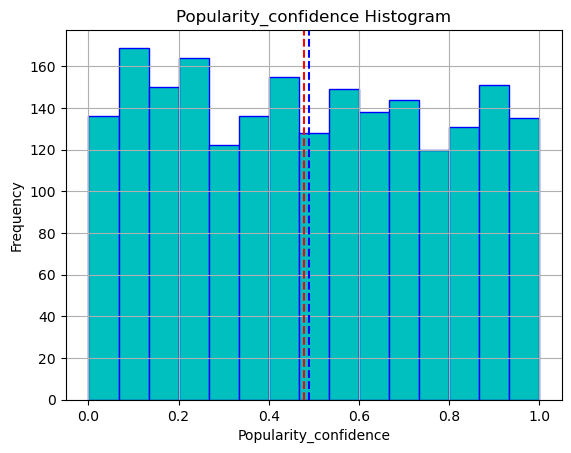

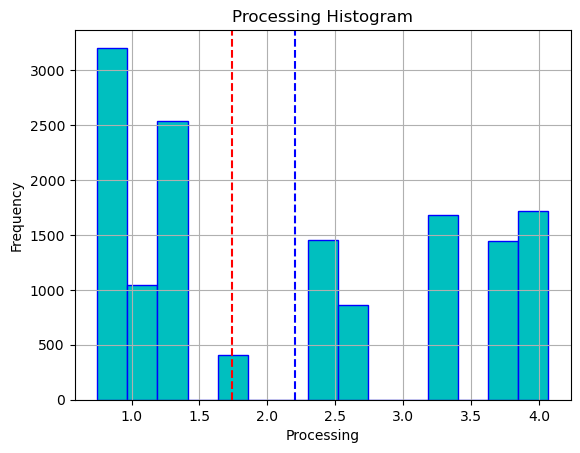

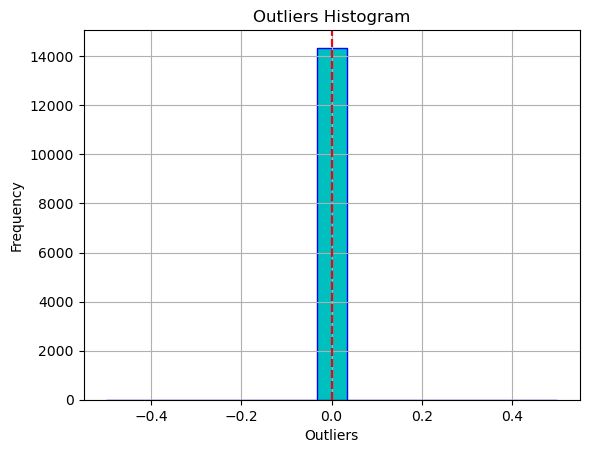

In [189]:
numeric_columns = new_data.select_dtypes(include=['number']).columns

for col in numeric_columns:
        bins_number = math.ceil(math.log2(new_data[col].size)) + 1
        new_data[col].hist(bins = bins_number, color = 'c', edgecolor = 'b')
        mean_value = new_data[col].mean()
        #mode_value = master[col].mode()
        median_value = new_data[col].median()
        plt.ticklabel_format(style='plain', axis='x')
        plt.title(str.capitalize(col) + ' Histogram')
        plt.xlabel(str.capitalize(col))
        plt.ylabel('Frequency')
        plt.axvline(mean_value, color = 'blue', linestyle = 'dashed')
        #plt.axvline(mode_value[0], color='#FF00FF', linestyle = '--')
        plt.axvline(median_value, color = 'red', linestyle = '--')
        plt.show()

#Boxplot code

In [190]:
""" numeric_columns = new_data.select_dtypes(include=['number']).columns
for col in numeric_columns:
        fig, ax = plt.subplots()
        boxprops = dict(linestyle='--', linewidth=2, color='blue', edgecolor='red')
        flierprops = dict(marker='o', markerfacecolor='green', markersize=8, linestyle='none')
        medianprops = dict(linestyle='-', linewidth=2, color='orange')
        box = ax.boxplot(new_data[col], patch_artist=True, boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)
        ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)
        ax.axhline(y=0, color='gray', linestyle='--', linewidth=2)
        plt.boxplot(new_data[col])
        plt.title(str.capitalize(col) +' Box Plot')
        plt.ylabel('Value')
        plt.show() """

" numeric_columns = new_data.select_dtypes(include=['number']).columns\nfor col in numeric_columns:\n        fig, ax = plt.subplots()\n        boxprops = dict(linestyle='--', linewidth=2, color='blue', edgecolor='red')\n        flierprops = dict(marker='o', markerfacecolor='green', markersize=8, linestyle='none')\n        medianprops = dict(linestyle='-', linewidth=2, color='orange')\n        box = ax.boxplot(new_data[col], patch_artist=True, boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)\n        ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)\n        ax.axhline(y=0, color='gray', linestyle='--', linewidth=2)\n        plt.boxplot(new_data[col])\n        plt.title(str.capitalize(col) +' Box Plot')\n        plt.ylabel('Value')\n        plt.show() "